In [21]:
import sys
sys.path.append("../")
from constants import *
import pandas as pd
import ast
from collections import Counter
import csv
import warnings
import h5py
import stacklineplot
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)

In [22]:
summary = pd.read_csv(DATASET_SUMMARY)#[:1000] # only first 100 elements -> easier to work with

/mnt/home2/dlongo/.conda/envs/mne-2/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [23]:
summary.head()

,file_name,patient_name,patientcode,gender,birthdate,patient_age_days,born_premature,gestatational_age_at_birth_days,bits_per_sample,start_isodatetime,...,technician,patient_additional,annotations,nk_file_reportkey,eegdata_uuid,nk_file_reportkey_uuid,studytype,base_file_name,file_source,old_file_name
0,lpch/CA0010ED_1-4+.eeghdf,"1260, Subject",2ee5afb61608548aaf92673d2ce8ea9b,Male,1990-01-01,27.187558,unknown,-1.0,16,1990-01-28 04:30:05,...,NaN,NaN,"[('REC START NEONATE EE', 1.7), ('A1+A2 OFF', ...",CA0010ED,35bd1516-6f12-512f-aeb5-40925f359fd1,eddeed09-371e-5219-b2bb-7843687fbd72,LTM,CA0010ED_1-4+.eeghdf,lpch,../lpch/longterm/CA0010ED_1-4+.eeghdf
1,lpch/CA8310Y9_1-8+.eeghdf,"1241, Subject",1815bcdb98275b62b6df98f5794c3156,Female,1990-01-01,5550.430660,unknown,-1.0,16,2005-03-13 10:20:09,...,NaN,NaN,"[('REC START DB EEG', 3.2000000000000002), ('A...",CA8310Y9,860140a1-81bb-5581-b819-2ad64adb60fd,330d2110-dd53-5e01-9400-42b45cf20fbe,LTM,CA8310Y9_1-8+.eeghdf,lpch,../lpch/longterm/CA8310Y9_1-8+.eeghdf
2,lpch/CA83110B_1-3+.eeghdf,"1215, Subject",a7e628c2c1085c1f85680c175b20d3f4,Male,1990-01-01,4897.914977,unknown,-1.0,16,2003-05-30 21:57:34,...,NaN,NaN,"[('REC START IA/DB EEG', 0.90000000000000002),...",CA83110B,4c64b1c0-b19e-5a78-9fde-88282d98d867,1929f45f-a51d-5b84-b06a-35ae09dddae8,LTM,CA83110B_1-3+.eeghdf,lpch,../lpch/longterm/CA83110B_1-3+.eeghdf
3,lpch/CA8312DO_1-9+.eeghdf,"1258, Subject",7cfe9ced26e35b85bfc2e340efc23f0a,Female,1990-01-01,482.541562,unknown,-1.0,16,1991-04-28 12:59:51,...,NaN,NaN,"[('REC START DB CAL', 0.0), ('A1+A2 OFF', 0.0)...",CA8312DO,01a790b8-a9b6-53a8-a653-03ad226eac9e,90d09f88-fa76-5759-8dca-e3fdb8d8983e,LTM,CA8312DO_1-9+.eeghdf,lpch,../lpch/longterm/CA8312DO_1-9+.eeghdf
4,lpch/CA83132S_1-2+.eeghdf,"1446, Subject",06548eef257453abb801755e54a18b75,Female,1990-01-01,764.598542,unknown,-1.0,16,1992-02-04 14:21:54,...,NaN,NaN,"[('REC START RICH-ALL E', 0.0), ('A1+A2 OFF', ...",CA83132S,5b9fb077-bfac-5251-84cc-ebccd9b73dfa,99506698-b38f-59f5-ba51-e9fc4f3b1752,LTM,CA83132S_1-2+.eeghdf,lpch,../lpch/longterm/CA83132S_1-2+.eeghdf


In [5]:
def save_annotation_counts(counts_list, filename):
    with open(filename, "w") as f:
        out = csv.writer(f)
        out.writerow(['Annotation', 'Count'])
        out.writerows(counts_list)

In [6]:
def get_annotations(summary, n=200):
    # returns list len = n sorted by most common[(artifact name, count),...]
    annotations_list = []
    for sample in summary["annotations"]:
        cur_samples_list = ast.literal_eval(sample) # must conver sample from string to list
        cur_annotations = [x[0] for x in cur_samples_list]
        annotations_list += cur_annotations
    annotations_cout_dict = Counter(annotations_list)
    return annotations_cout_dict.most_common(n)
    
counts = get_annotations(summary)
save_annotation_counts(counts, "test.csv")

In [7]:
pd.read_csv("test.csv")#.head()

,Annotation,Count
0,A1+A2 OFF,135190
1,Spike T3-aT3 1.00,96501
2,REC START DB EEG,78228
3,Spike T5-aT5 1.00,60840
4,Spike T6-aT6 1.00,48748
5,Spike T4-aT4 1.00,47551
6,MARK ON,34659
7,Spike F3-aF3 1.00,32543
8,Spike F7-aF7 1.00,32071
9,Spike C4-aC4 1.00,30617


In [26]:
def check_count_statisfied(target_artifacts, cur_out_artifacts):
    for artifact_name, count in target_artifacts.items():
        if count != len(cur_out_artifacts[artifact_name]):
            # count hasn't yet been reached
            return False
    return True
        

def get_filenames_by_artifacts(target_artifacts):
    '''
     target_artifacts is {artifact name: count, ....}

    returns {artifact name : [(filename, pos), ...], ...}
    '''
    # load summary file
    summary = pd.read_csv(DATASET_SUMMARY)
#     summary = summary.sample(frac=1) # to shuffle
    
    target_artifact_names = list(target_artifacts.keys())
    out_artifacts = {}

    
    # Initial artifacts dict with empty lists
    for artifact_name in target_artifact_names:
        out_artifacts[artifact_name] = []
    
    for _, sample in summary.iterrows():
        
        # Ensure that the counts have not yet been met
        if check_count_statisfied(target_artifacts, out_artifacts):
            return out_artifacts
        
        annotations = sample["annotations"]
        filename = DATASET_PATH + sample["file_name"]
        frequency = sample["sample_frequency"]
        assert(int(frequency) == float(frequency))
        frequency = int(frequency)
        
        annoations_list = ast.literal_eval(annotations)
        
        for annoation in annoations_list:
        
            annoation_name, annoation_time = annoation
            if annoation_name in target_artifact_names:
                
                # Check to ensure the count hasn't yet been satisfied
                if len(out_artifacts[annoation_name]) < target_artifacts[annoation_name]:
                    out_artifacts[annoation_name].append((filename, int(annoation_time * frequency)))
                    
    if not (check_count_statisfied(target_artifacts, out_artifacts)):
        warnings.warn("COUNT NOT MET")
    return out_artifacts

In [27]:
target_artifacts = {
    "blink" : 220,
#     "yawning" : 5,
#     "PHOTO 30Hz" : 5
}
artifacts = get_filenames_by_artifacts(target_artifacts)

/mnt/home2/dlongo/.conda/envs/mne-2/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


issue to have lpch and stanford?

In [28]:
artifacts["blink"]

[('/mnt/data1/eegdbs/SEC-0.1/lpch/FA04618E_1-1+.eeghdf', 13563),
 ('/mnt/data1/eegdbs/SEC-0.1/lpch/FA04618E_1-1+.eeghdf', 80921),
 ('/mnt/data1/eegdbs/SEC-0.1/lpch/CA8943CZ_1-1+.eeghdf', 200943),
 ('/mnt/data1/eegdbs/SEC-0.1/lpch/CA0010EX_1-1+.eeghdf', 745548),
 ('/mnt/data1/eegdbs/SEC-0.1/lpch/CA0555WC_1-1+.eeghdf', 128488),
 ('/mnt/data1/eegdbs/SEC-0.1/lpch/DA11200J_1-1+.eeghdf', 2991),
 ('/mnt/data1/eegdbs/SEC-0.1/lpch/DA11200J_1-1+.eeghdf', 37012),
 ('/mnt/data1/eegdbs/SEC-0.1/lpch/DA11200J_1-1+.eeghdf', 40740),
 ('/mnt/data1/eegdbs/SEC-0.1/lpch/DA11200J_1-1+.eeghdf', 52079),
 ('/mnt/data1/eegdbs/SEC-0.1/lpch/EA1221KA_1-1+.eeghdf', 233979),
 ('/mnt/data1/eegdbs/SEC-0.1/lpch/FA2730ON_1-1+.eeghdf', 66038),
 ('/mnt/data1/eegdbs/SEC-0.1/lpch/FA2742ZE_1-1+.eeghdf', 296273),
 ('/mnt/data1/eegdbs/SEC-0.1/lpch/EA1221AE_1-1+.eeghdf', 225028),
 ('/mnt/data1/eegdbs/SEC-0.1/lpch/EA1221CL_1-1+.eeghdf', 295442),
 ('/mnt/data1/eegdbs/SEC-0.1/lpch/BA1230CC_1-1+.eeghdf', 292072),
 ('/mnt/data1/eegd

In [38]:
sample_filename, sample_pos = artifacts["blink"][1] # 3

In [39]:
hdf = h5py.File(sample_filename)

In [40]:
rec = hdf['record-0']
signals = rec['signals']
labels = rec['signal_labels']
electrode_labels = [str(s,'ascii') for s in labels]
numbered_electrode_labels = ["%d:%s" % (ii, str(labels[ii], 'ascii')) for ii in range(len(labels))]

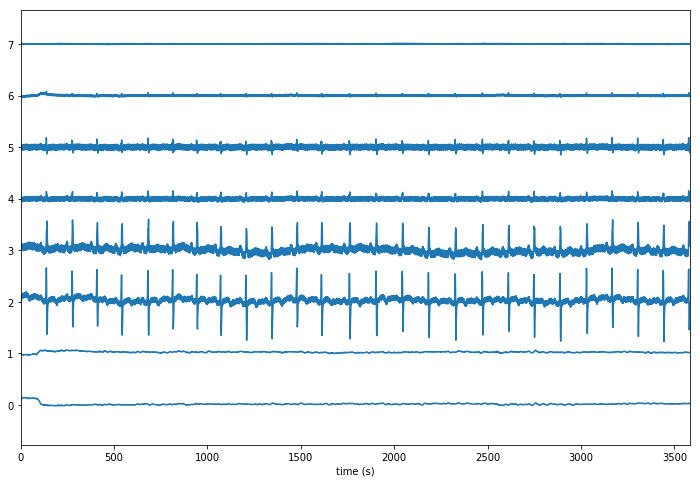

In [43]:
stacklineplot.stackplot(signals[24:32, sample_pos - 84: sample_pos + 700*5], yscale=1)

### The Blink Dataloader

In [9]:
import sys
sys.path.append("../artifacts")
from blink_1c import Blink1c
import torch
from utils import custom_norm_batch
import numpy as np

In [10]:
dataset = Blink1c(20)

In [19]:
samples = []
for i in range(16):
    samples.append()
    
sample = dataset[5]

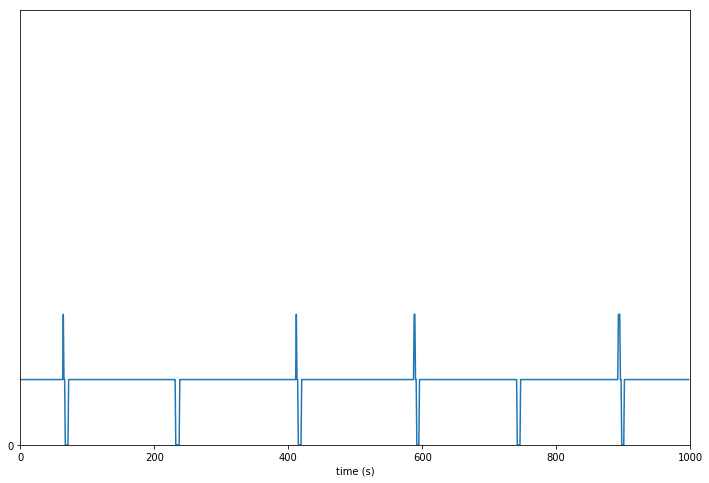

In [20]:
sample = dataset[5]
stacklineplot.stackplot(sample, yscale=.3)